In [2]:
import tensorflow as tf

2023-12-28 00:01:59.975067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-28 00:02:00.127621: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 00:02:00.626039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.2/lib64:/home/parameswar/anaconda3/envs/tf/lib/
2023-12-28 00:02:00.626116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-12-28 00:03:21.530811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-28 00:03:21.571870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-28 00:03:21.572145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
insurance_data = pd.read_csv("insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_one_hot = pd.get_dummies(insurance_data, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [7]:
X = insurance_one_hot.drop("charges", axis =1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
y.shape

(1338,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
len(X),len(X_train), len(X_test),len(y_train)

(1338, 1070, 268, 1070)

In [11]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100


2023-12-27 22:19:11.927534: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-27 22:19:11.928869: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-27 22:19:11.929227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-27 22:19:11.929430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

34/34 [==============================] - 1s 2ms/step - loss: 8658.1426 - mae: 8658.1426
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.5215 - mae: 7884.5215
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7600.5254 - mae: 7600.5254
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7730.5234 - mae: 7730.5234
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7793.3042 - mae: 7793.3042
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7539.6650 - mae: 7539.6650
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7490.8970 - mae: 7490.8970
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7745.1436 - mae: 7745.1436
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7549.4292 - mae: 7549.4292
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7746.6948 - mae: 7746.6948
Epoch 11/10

In [12]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7393.1416 - mae: 7393.1416


[7393.1416015625, 7393.1416015625]

In [13]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics =["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13308.9092 - mae: 13308.9092
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13181.0020 - mae: 13181.0020
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12902.0859 - mae: 12902.0859
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12330.4238 - mae: 12330.4238
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11319.8203 - mae: 11319.8203
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9901.5762 - mae: 9901.5762
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8456.7578 - mae: 8456.7578
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7608.9185 - mae: 7608.9185
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7430.3354 - mae: 7430.3354
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7406.0845 - mae:

In [14]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5026.9551 - mae: 5026.9551


[5026.955078125, 5026.955078125]

In [15]:
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history =insurance_model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 2ms/step - loss: 13290.6729 - mae: 13290.6729
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13124.4414 - mae: 13124.4414
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12783.9023 - mae: 12783.9023
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12119.7939 - mae: 12119.7939
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 11006.7002 - mae: 11006.7002
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 9568.5811 - mae: 9568.5811
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 8227.5732 - mae: 8227.5732
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7544.3442 - mae: 7544.3442
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7425.2739 - mae: 7425.2739
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7403.7881 - mae:

In [16]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.5662 - mae: 3170.5662


[3170.566162109375, 3170.566162109375]

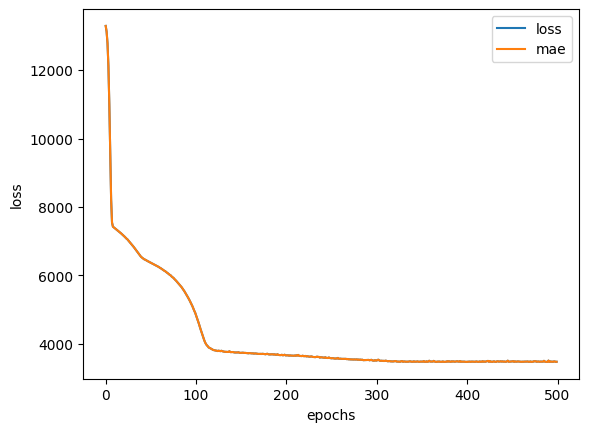

In [17]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

## Normalization and Standardization

<Axes: ylabel='Frequency'>

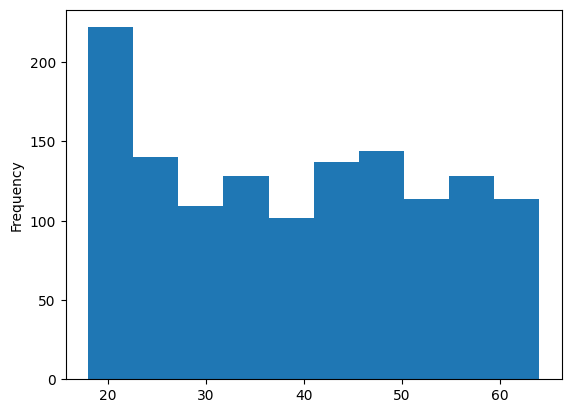

In [18]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

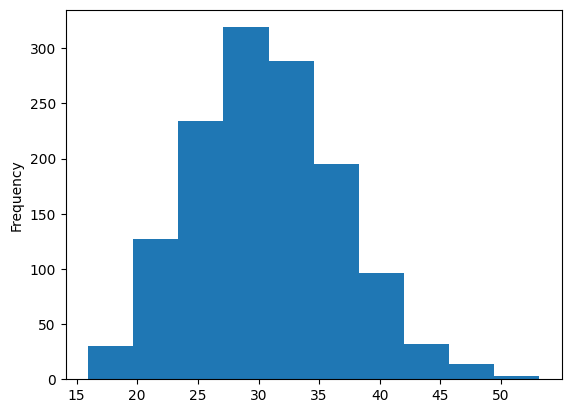

In [19]:
X["bmi"].plot(kind="hist")

In [24]:
insurance = insurance_data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [26]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxscaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [27]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [28]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [29]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [30]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [34]:
tf.random.set_seed(42)
insurance_model_4 = tf.keras.Sequential(
[    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)]
)

insurance_model_4.compile(loss= tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13343.7461 - mae: 13343.7461
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13335.0068 - mae: 13335.0068
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13313.2646 - mae: 13313.2646
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13267.6094 - mae: 13267.6094
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13186.7744 - mae: 13186.7744
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13059.9355 - mae: 13059.9355
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12876.8320 - mae: 12876.8320
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12626.9785 - mae: 12626.9785
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12300.1338 - mae: 12300.1338
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11893.18

In [35]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.5955 - mae: 3169.5955


[3169.595458984375, 3169.595458984375]